#Final Project, Machine Learning Applications
- Daniel Kwapien, 100472421
- Olga Bonachera del Pozo, 100472782
- Alejandro Sánchez Díez, 100472892
- Eduardo González Agüero, 100472704


# 1. Import and datasets

In [ ]:
import os
import numpy as np
import pandas as pd
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")
sns.color_palette("deep")

<ipython-input-1-8ffce8b55527>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
try:
  import opendatasets as od
except ModuleNotFoundError:
  %pip install opendatasets
  import opendatasets as od

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/talks.csv')

Mounted at /content/drive


In [ ]:
df.head()

,talk_id,title,description,speaker,recorded_date,published_date,event,duration,topic_names,views,files
0,129163,How AI is unlocking the secrets of nature and ...,Can AI help us answer life's biggest questions...,Demis Hassabis,2024-04-16,2024-04-29T14:33:21Z,TED2024,1533,"science,technology,innovation,future,AI,humani...",483721,NaN
1,128758,My epic journey becoming the fastest person to...,"What challenges lie ahead of a staggering 12,7...",Bonnie Hancock,2023-11-16,2024-04-30T14:47:22Z,TED@BCG,600,"sports,motivation,personal growth,humanity",318908,NaN
2,128547,How do gas masks actually work?,You might think of gas masks as clunky militar...,George Zaidan,2024-04-30,2024-04-30T15:14:51Z,TED-Ed,254,"environment,technology,design,education,natura...",177866,NaN
3,128041,The workers rebuilding communities after natur...,As climate change leads to more and more natur...,Saket Soni,2023-11-15,2024-05-01T14:48:47Z,TED Democracy,779,"climate change,social change,communication,com...",15153,NaN
4,129460,How to govern AI — even if it's hard to predict,"No one truly understands AI, not even experts,...",Helen Toner,2024-04-16,2024-05-01T14:50:35Z,TED2024,676,"technology,computers,innovation,future,AI,poli...",330594,NaN


In [ ]:
df.columns

Index(['talk_id', 'title', 'description', 'speaker', 'recorded_date',
       'published_date', 'event', 'duration', 'topic_names', 'views', 'files'],
      dtype='object')

# 2. Dataset preprocessing

## Clean NA's

In [ ]:
df.isna().sum()

talk_id              0
title                0
description          0
speaker              1
recorded_date        3
published_date       0
event                2
duration             0
topic_names         12
views                0
files             6368
dtype: int64

In [ ]:
df = df.drop(['files'], axis = 1)

In [ ]:
df.isna().sum()

talk_id            0
title              0
description        0
speaker            1
recorded_date      3
published_date     0
event              2
duration           0
topic_names       12
views              0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
print('Dataset rows: ',len(df))

Dataset rows:  6351


## 2.4. DATASET TOPICS

In [ ]:
df['topic_names'].head()

0    science,technology,innovation,future,AI,humani...
1           sports,motivation,personal growth,humanity
2    environment,technology,design,education,natura...
3    climate change,social change,communication,com...
4    technology,computers,innovation,future,AI,poli...
Name: topic_names, dtype: object

In [ ]:
df['topic_split'] = df['topic_names'].str.split(',')

<ipython-input-12-e7d8c4277d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_split'] = df['topic_names'].str.split(',')


In [ ]:
df['topic_split']

0       [science, technology, innovation, future, AI, ...
1         [sports, motivation, personal growth, humanity]
2       [environment, technology, design, education, n...
3       [climate change, social change, communication,...
4       [technology, computers, innovation, future, AI...
                              ...                        
6363           [culture, technology, education, equality]
6364            [sustainability, business, manufacturing]
6365    [design, architecture, innovation, society, di...
6366    [climate change, environment, social change, f...
6367    [climate change, environment, science, DNA, ed...
Name: topic_split, Length: 6351, dtype: object

Check how many categories we have

In [ ]:
explode_df = df.copy().explode('topic_split')
category_counts = explode_df['topic_split'].value_counts()
print(category_counts)

topic_split
science          1495
technology       1426
TED-Ed           1070
education        1007
animation         990
                 ... 
collective          2
Hinduism            1
crowdsourcing       1
TV                  1
wildlife            1
Name: count, Length: 356, dtype: int64


In [ ]:
import re
urls = {
    "art" : "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=architecture&topics%5B1%5D=art&topics%5B2%5D=augmented%20reality&topics%5B3%5D=beauty&topics%5B4%5D=conducting&topics%5B5%5D=creativity&topics%5B6%5D=design&topics%5B7%5D=fashion&topics%5B8%5D=film&topics%5B9%5D=journalism&topics%5B10%5D=language&topics%5B11%5D=literature&topics%5B12%5D=media&topics%5B13%5D=museums&topics%5B14%5D=music&topics%5B15%5D=performance&topics%5B16%5D=photography&topics%5B17%5D=poetry&topics%5B18%5D=science%20fiction&topics%5B19%5D=sound&topics%5B20%5D=storytelling&topics%5B21%5D=theater&topics%5B22%5D=virtual%20reality&topics%5B23%5D=visualizations&topics%5B24%5D=writing",
    "business": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=behavioral%20economics&topics%5B1%5D=blockchain&topics%5B2%5D=business&topics%5B3%5D=capitalism&topics%5B4%5D=consumerism&topics%5B5%5D=entrepreneur&topics%5B6%5D=investing&topics%5B7%5D=manufacturing&topics%5B8%5D=marketing&topics%5B9%5D=money&topics%5B10%5D=women%20in%20business",
    "climate change": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=climate%20change&topics%5B1%5D=driverless%20cars&topics%5B2%5D=electricity&topics%5B3%5D=energy&topics%5B4%5D=fossil%20fuels&topics%5B5%5D=natural%20resources&topics%5B6%5D=plastic&topics%5B7%5D=pollution&topics%5B8%5D=renewable%20energy&topics%5B9%5D=sustainability",
    "communication": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=body%20language&topics%5B1%5D=collaboration&topics%5B2%5D=communication&topics%5B3%5D=language&topics%5B4%5D=social%20media&topics%5B5%5D=public%20speaking&topics%5B6%5D=storytelling&topics%5B7%5D=visualizations",
    "education":"https://www.ted.com/talks?sort=relevance&topics%5B0%5D=visualizations&topics%5B1%5D=animation&topics%5B2%5D=autism%20spectrum%20disorder&topics%5B3%5D=education&topics%5B4%5D=kids&topics%5B5%5D=math&topics%5B6%5D=museums&topics%5B7%5D=teaching&topics%5B8%5D=ted-ed&topics%5B9%5D=toys",
    "entertainment": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=toys&topics%5B1%5D=entertainment&topics%5B2%5D=film&topics%5B3%5D=gaming&topics%5B4%5D=humor&topics%5B5%5D=magic&topics%5B6%5D=music&topics%5B7%5D=performance&topics%5B8%5D=television&topics%5B9%5D=theater&topics%5B10%5D=travel",
    "global issues": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=activism&topics%5B1%5D=ancient%20world&topics%5B2%5D=anthropology&topics%5B3%5D=global%20issues&topics%5B4%5D=government&topics%5B5%5D=health%20care&topics%5B6%5D=history&topics%5B7%5D=immigration&topics%5B8%5D=infrastructure&topics%5B9%5D=international%20development&topics%5B10%5D=military&topics%5B11%5D=policy&topics%5B12%5D=politics&topics%5B13%5D=public%20health&topics%5B14%5D=public%20space&topics%5B15%5D=religion&topics%5B16%5D=sociology&topics%5B17%5D=surveillance&topics%5B18%5D=transportation&topics%5B19%5D=war",
    "politics": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=government&topics%5B1%5D=health%20care&topics%5B2%5D=immigration&topics%5B3%5D=infrastructure&topics%5B4%5D=international%20development&topics%5B5%5D=military&topics%5B6%5D=policy&topics%5B7%5D=politics&topics%5B8%5D=public%20health&topics%5B9%5D=public%20space&topics%5B10%5D=transportation&topics%5B11%5D=war&topics%5B12%5D=capitalism&topics%5B13%5D=cities&topics%5B14%5D=community&topics%5B15%5D=corruption&topics%5B16%5D=crime&topics%5B17%5D=democracy&topics%5B18%5D=human%20rights&topics%5B19%5D=justice%20system&topics%5B20%5D=law&topics%5B21%5D=poverty&topics%5B22%5D=refugees&topics%5B23%5D=terrorism&topics%5B24%5D=urban%20planning",
    "health": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=health%20care&topics%5B1%5D=public%20health&topics%5B2%5D=addiction&topics%5B3%5D=aging&topics%5B4%5D=autism%20spectrum%20disorder&topics%5B5%5D=bacteria&topics%5B6%5D=brain&topics%5B7%5D=cancer&topics%5B8%5D=cognitive%20science&topics%5B9%5D=coronavirus&topics%5B10%5D=death&topics%5B11%5D=disability&topics%5B12%5D=disease&topics%5B13%5D=drugs&topics%5B14%5D=exercise&topics%5B15%5D=genetics&topics%5B16%5D=health&topics%5B17%5D=human%20body&topics%5B18%5D=medicine&topics%5B19%5D=pregnancy&topics%5B20%5D=sex&topics%5B21%5D=sleep&topics%5B22%5D=surgery&topics%5B23%5D=transgender",
    "leadership": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=communication&topics%5B1%5D=creativity&topics%5B2%5D=goals&topics%5B3%5D=leadership&topics%5B4%5D=motivation&topics%5B5%5D=productivity&topics%5B6%5D=public%20speaking&topics%5B7%5D=success&topics%5B8%5D=women%20in%20business&topics%5B9%5D=work-life%20balance",
    "nature": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=animals&topics%5B1%5D=bees&topics%5B2%5D=biodiversity&topics%5B3%5D=birds&topics%5B4%5D=conservation&topics%5B5%5D=coral%20reefs&topics%5B6%5D=dinosaurs&topics%5B7%5D=ecology&topics%5B8%5D=fish&topics%5B9%5D=fungi&topics%5B10%5D=glaciers&topics%5B11%5D=insects&topics%5B12%5D=nature&topics%5B13%5D=ocean&topics%5B14%5D=plants&topics%5B15%5D=rivers&topics%5B16%5D=trees&topics%5B17%5D=water",
    "personal growth": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=aging&topics%5B1%5D=communication&topics%5B2%5D=compassion&topics%5B3%5D=creativity&topics%5B4%5D=curiosity&topics%5B5%5D=death&topics%5B6%5D=depression&topics%5B7%5D=emotions&topics%5B8%5D=empathy&topics%5B9%5D=ethics&topics%5B10%5D=fear&topics%5B11%5D=happiness&topics%5B12%5D=love&topics%5B13%5D=mental%20health&topics%5B14%5D=mindfulness&topics%5B15%5D=motivation&topics%5B16%5D=personal%20growth&topics%5B17%5D=sex&topics%5B18%5D=sleep&topics%5B19%5D=trust&topics%5B20%5D=vulnerability",
    "psychology": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=compassion&topics%5B1%5D=creativity&topics%5B2%5D=curiosity&topics%5B3%5D=depression&topics%5B4%5D=emotions&topics%5B5%5D=empathy&topics%5B6%5D=ethics&topics%5B7%5D=fear&topics%5B8%5D=happiness&topics%5B9%5D=love&topics%5B10%5D=mental%20health&topics%5B11%5D=mindfulness&topics%5B12%5D=motivation&topics%5B13%5D=vulnerability&topics%5B14%5D=addiction&topics%5B15%5D=behavioral%20economics&topics%5B16%5D=brain&topics%5B17%5D=consciousness&topics%5B18%5D=memory&topics%5B19%5D=personality&topics%5B20%5D=psychology&topics%5B21%5D=violence",
    "science": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=aliens&topics%5B1%5D=astronomy&topics%5B2%5D=bacteria&topics%5B3%5D=chemistry&topics%5B4%5D=dinosaurs&topics%5B5%5D=electricity&topics%5B6%5D=evolution&topics%5B7%5D=life&topics%5B8%5D=marine%20biology&topics%5B9%5D=mars&topics%5B10%5D=moon&topics%5B11%5D=physics&topics%5B12%5D=planets&topics%5B13%5D=science&topics%5B14%5D=space&topics%5B15%5D=universe",
    "fitness": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=dance&topics%5B1%5D=exercise&topics%5B2%5D=food&topics%5B3%5D=motivation&topics%5B4%5D=sports",
    "social change": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=activism&topics%5B1%5D=anthropology&topics%5B2%5D=disability&topics%5B3%5D=diversity&topics%5B4%5D=equality&topics%5B5%5D=human%20rights&topics%5B6%5D=inclusion&topics%5B7%5D=indigenous%20peoples&topics%5B8%5D=lgbtqia%2B&topics%5B9%5D=philanthropy&topics%5B10%5D=protest&topics%5B11%5D=race&topics%5B12%5D=slavery&topics%5B13%5D=social%20change&topics%5B14%5D=transgender",
    "technology": "https://www.ted.com/talks?sort=relevance&topics%5B0%5D=3d%20printing&topics%5B1%5D=ai&topics%5B2%5D=blockchain&topics%5B3%5D=computers&topics%5B4%5D=cyber%20security&topics%5B5%5D=data&topics%5B6%5D=driverless%20cars&topics%5B7%5D=drones&topics%5B8%5D=engineering&topics%5B9%5D=future&topics%5B10%5D=internet&topics%5B11%5D=nanotechnology&topics%5B12%5D=robots&topics%5B13%5D=social%20media&topics%5B14%5D=software&topics%5B15%5D=surveillance&topics%5B16%5D=technology&topics%5B17%5D=virtual%20reality"
}

general_topics = {}

for key, url in urls.items():
  pattern = r"topics%5B\d+%5D=(\w+)" # Extract the topic names
  matches = re.findall(pattern, url)
  if matches:
    general_topics[str(key)] = matches # Append the specific topic to the general topic

# Append topics that do not appear
general_topics['education'].append('TED-Ed')
general_topics['science'].append('biology')

In [ ]:
all_categories = category_counts.index.values # Save all categories

In [ ]:
general_topics.keys()

dict_keys(['art', 'business', 'climate change', 'communication', 'education', 'entertainment', 'global issues', 'politics', 'health', 'leadership', 'nature', 'personal growth', 'psychology', 'science', 'fitness', 'social change', 'technology'])

In [ ]:
all_categories = category_counts.index.values

In [ ]:
categories_to_remove = np.array([])

# If the cateogry is not a broad topic, we should remove it
for category in all_categories:
    if category not in general_topics.keys():
        categories_to_remove = np.append(categories_to_remove, category)

categories_to_remove = np.append(categories_to_remove, ['TEDx'])
print(len(categories_to_remove))

341


In [ ]:
# Replace specific topics by broader topics and remove them
def replace_topics(row):
    broader_topics = []
    for topic in row['topic_split']:
        found = False
        for broader_category, specific_topics in general_topics.items():
            if topic in specific_topics:
                broader_topics.append(broader_category)
                found = True
                break

        if not found:
            broader_topics.append(topic)

    # We use set to remove the duplicates
    new_topics = [category for category in set(broader_topics) if category not in categories_to_remove]

    return new_topics if len(new_topics) > 0 else np.NAN

# Check the new topics
full_df = df.copy()
full_df['topic_split']= full_df.apply(replace_topics, axis=1)
full_df = full_df.dropna()

explode_df = full_df.copy().explode('topic_split')
category_counts = explode_df['topic_split'].value_counts()
with pd.option_context('display.max_rows', None):
    print(category_counts)

topic_split
art                3454
global issues      2711
technology         1895
education          1649
business           1194
health             1189
social change      1166
politics           1005
personal growth     991
science             920
nature              781
climate change      777
communication       713
leadership          628
entertainment       583
psychology          560
fitness             319
Name: count, dtype: int64


Let's take a look at the new frequencies

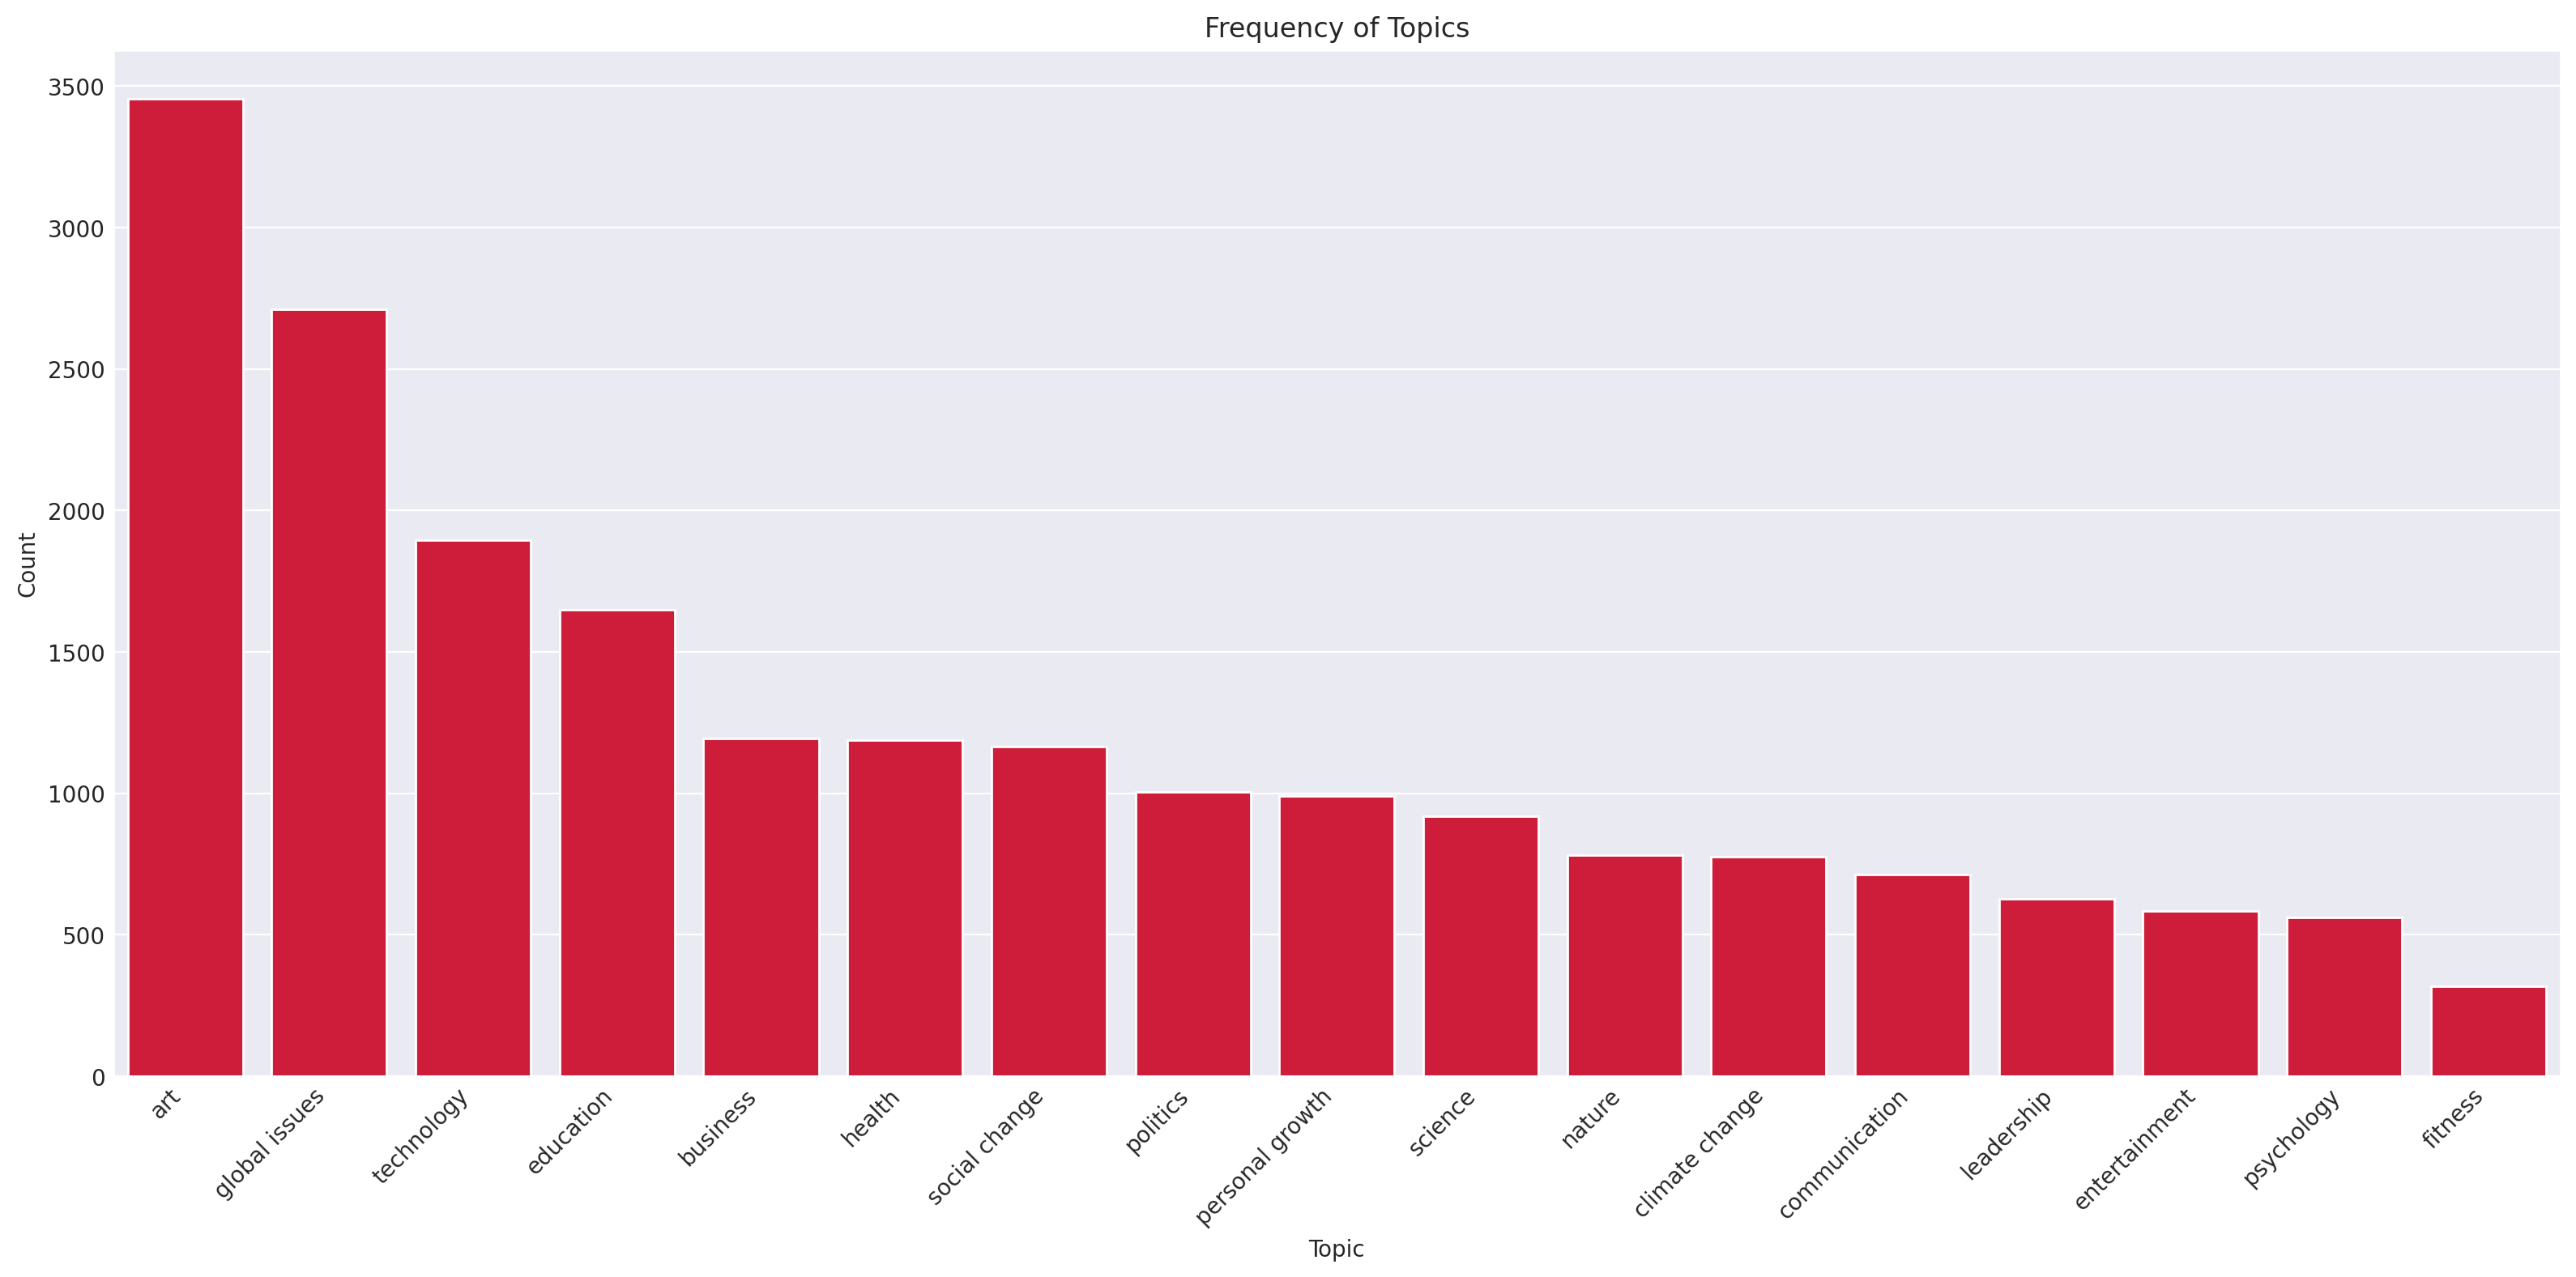

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=category_counts.index, y=category_counts.values, color='#EB0028')

plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Frequency of Topics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Join the title and the description

In [ ]:
def join_text(row):
    return "\n".join(row.loc[['title', 'description']].dropna())

full_df['text'] = df.apply(join_text, axis=1)

This the dataframe we will work with

In [ ]:
full_df

,talk_id,title,description,speaker,recorded_date,published_date,event,duration,topic_names,views,topic_split,text
0,129163,How AI is unlocking the secrets of nature and ...,Can AI help us answer life's biggest questions...,Demis Hassabis,2024-04-16,2024-04-29T14:33:21Z,TED2024,1533,"science,technology,innovation,future,AI,humani...",483721,"[art, technology]",How AI is unlocking the secrets of nature and ...
1,128758,My epic journey becoming the fastest person to...,"What challenges lie ahead of a staggering 12,7...",Bonnie Hancock,2023-11-16,2024-04-30T14:47:22Z,TED@BCG,600,"sports,motivation,personal growth,humanity",318908,"[personal growth, fitness, leadership]",My epic journey becoming the fastest person to...
2,128547,How do gas masks actually work?,You might think of gas masks as clunky militar...,George Zaidan,2024-04-30,2024-04-30T15:14:51Z,TED-Ed,254,"environment,technology,design,education,natura...",177866,"[education, technology, art, science]",How do gas masks actually work?\nYou might thi...
3,128041,The workers rebuilding communities after natur...,As climate change leads to more and more natur...,Saket Soni,2023-11-15,2024-05-01T14:48:47Z,TED Democracy,779,"climate change,social change,communication,com...",15153,"[global issues, communication, social change, ...",The workers rebuilding communities after natur...
4,129460,How to govern AI — even if it's hard to predict,"No one truly understands AI, not even experts,...",Helen Toner,2024-04-16,2024-05-01T14:50:35Z,TED2024,676,"technology,computers,innovation,future,AI,poli...",330594,"[global issues, technology]",How to govern AI — even if it's hard to predic...
...,...,...,...,...,...,...,...,...,...,...,...,...
6363,10561,Using Aboriginal traditions to teach tech,Michael Mieni is the first-ever Indigenous IT ...,Michael Mieni,2017-12-11,2018-02-15T17:10:53Z,TED@Westpac,575,"culture,technology,education,equality",14894,"[technology, education, social change]",Using Aboriginal traditions to teach tech\nMic...
6364,10565,The complex path to sustainability,Do you know where everything you buy comes fro...,Olivia Tyler,2017-12-11,2018-02-15T17:12:31Z,TED@Westpac,460,"sustainability,business,manufacturing",72737,"[business, climate change]",The complex path to sustainability \nDo you kn...
6365,54971,The cost of failing to design accessibly,"In this passionate talk, writer and disability...",Kings Floyd,2019-11-02,2019-12-13T22:17:22Z,TEDxDirigo,633,"design,architecture,innovation,society,disability",19653,"[art, health]",The cost of failing to design accessibly\nIn t...
6366,54750,Why lakes and rivers should have the same righ...,Water is essential to life. Yet in the eyes of...,Kelsey Leonard,2019-12-04,2019-12-13T15:58:24Z,TEDWomen 2019,792,"climate change,environment,social change,futur...",3519741,"[global issues, nature, technology, social cha...",Why lakes and rivers should have the same righ...


# 3. Text preprocessing

## 3.1. Import Libraries

In [ ]:
import re
import nltk

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

from bs4 import BeautifulSoup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.8 MB/s eta 0:00:00


## 3.2. Wrangle text

In [ ]:
def wrangle_text(text):

  soup = BeautifulSoup(text, 'html.parser')
  text_without_tags = soup.get_text(separator='\n')

  url_pattern = r'https?://\S+|www\.\S+'
  text_without_urls = re.sub(url_pattern, '', text_without_tags)

  wrangled_text = contractions.fix(text_without_urls)

  return wrangled_text.lower()

print(colored('\n============= Raw description =============', 'blue'))

first_description = full_df.loc[37, 'description']
print(first_description)


print(colored('\n============= After wrangling result =============', 'blue'))

wrangled_description = wrangle_text(first_description)
print(wrangled_description)


============= Raw description =============
In the mid-18th century, England was crazy for ketchup. The sauce was a staple, but this ketchup wasn’t the ubiquitous red goop you’re familiar with today. In fact, it was a sweet and savory brown sauce that didn’t even have tomatoes in it. So where did this early ketchup come from, and how did it become the dip we know and love? Dan Kwartler traces the condiment's history. [Directed by Denys Spolitak, narrated by Addison Anderson, music by Cem Misirlioglu, Greg Chudzik].

============= After wrangling result =============
in the mid-18th century, england was crazy for ketchup. the sauce was a staple, but this ketchup was not the ubiquitous red goop you are familiar with today. in fact, it was a sweet and savory brown sauce that did not even have tomatoes in it. so where did this early ketchup come from, and how did it become the dip we know and love? dan kwartler traces the condiment's history. [directed by denys spolitak, narrated by addis

In [ ]:
full_df['text'] = full_df['text'].apply(wrangle_text)

<ipython-input-25-c3b5659db7ae>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


## 3.4. Spacy pipeline

In [ ]:
import spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_md')

In [ ]:
def normalize(doc):
    return [token.lemma_ for token in doc if token.has_vector and token.is_alpha and not token.is_punct and not token.is_stop and not token.ent_type_]

In [ ]:
from spacy.language import Language

@Language.component("normalize_doc_component")
def create_normalize_doc_component(doc):
   return normalize(doc)

In [ ]:
nlp.Defaults.stop_words |= {'presentation','episode', 'ted',
                            'tedtalk', 'music', 'talk', 'conversation',
                            'says', 'directed', 'narrated', 'world',
                            'new', 'like', 'shares', 'people', 'help', 'shows',
                            'explains', 'way', 'studio'}

In [ ]:
nlp.add_pipe("normalize_doc_component", after="ner")
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'normalize_doc_component']

In [ ]:
docs = list(nlp.pipe(full_df['text'],batch_size=50))

30 seconds

**TIEMPOS DE EJECUCIÓN AQUÍ**

This is the result of the tokenized text

In [ ]:
print('The first original sentence is:', full_df['text'].loc[0])
print('-----------------------------------------')
print(f'The first normalized sentence is: {docs[0]}. The length of the document is {len(docs[0])} tokens')

The first original sentence is: how ai is unlocking the secrets of nature and the universe
can ai help us answer life's biggest questions? in this visionary conversation, google deepmind cofounder and ceo demis hassabis delves into the history and incredible capabilities of ai with head of ted chris anderson. hassabis explains how ai models like alphafold — which accurately predicted the shapes of all 200 million proteins known to science in under a year — have already accelerated scientific discovery in ways that will benefit humanity. next up? hassabis says ai has the potential to unlock the greatest mysteries surrounding our minds, bodies and the universe.
-----------------------------------------
The first normalized sentence is: ['ai', 'unlock', 'secret', 'nature', 'universe', 'ai', 'answer', 'life', 'big', 'question', 'visionary', 'cofounder', 'ceo', 'delve', 'history', 'incredible', 'capability', 'ai', 'head', 'ai', 'model', 'accurately', 'predict', 'shape', 'protein', 'know', '

# 4. Text vectorization

We need to import the gensim functions

In [ ]:
from gensim.models import Word2Vec, TfidfModel
from gensim.corpora import Dictionary

## 4.1. Bag-Of-Words

Obtain the processes and tokenized docs and create a gensim dictionary with it, then create a BoW and a TF-IDF model

In [ ]:
D = Dictionary(docs)

In [ ]:
D.doc2bow(docs[6])

[(75, 1),
 (86, 1),
 (91, 1),
 (165, 1),
 (166, 2),
 (167, 1),
 (168, 2),
 (169, 2),
 (170, 4),
 (171, 1),
 (172, 1),
 (173, 1),
 (174, 1)]

In [ ]:
len(D)

14211

In [ ]:
words = pd.DataFrame(columns=["token", "ndocs"])
for row in [D.doc2bow(doc) for doc in docs]:
  for word_id, count in row:
    token = D[word_id]
    if token not in words.index:
      words.loc[token] = [token, 0]
    words.loc[token, "ndocs"] += count

words = words.sort_values(by="ndocs", ascending=False)

In [ ]:
words

,token,ndocs
life,life,1282
work,work,1160
change,change,966
human,human,779
need,need,763
...,...,...
trifecta,trifecta,1
gravitating,gravitating,1
polish,polish,1
bò,bò,1


In [ ]:
lower_limit = 2
upper_limit = .80

D.filter_extremes(no_below=lower_limit,no_above=upper_limit)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

The dictionary contains 8466 terms


In [ ]:
from gensim.models import TfidfModel

bow = [D.doc2bow(doc) for doc in docs]
tfidf = TfidfModel(bow)

In [ ]:
from gensim.matutils import corpus2csc
n_tokens = len(D)
num_docs = len(bow)
corpus_bow_sparse = corpus2csc(bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(tfidf[bow], num_terms=n_tokens, num_docs=num_docs).T

## 4.2. Word2Vec

In [ ]:
from gensim.models import KeyedVectors
word2vec = Word2Vec(sentences=docs, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = word2vec.wv

word_vectors.save("model_w2v.wordvectors")
wv = KeyedVectors.load("model_w2v.wordvectors", mmap='r')

In [ ]:
print(colored('\n============= Word2Vec vocabulary =============', 'blue'))
words = list(wv.key_to_index)
print(words[0:50])
print(colored('\n============= Embedding of the first word =============', 'blue'))
print(wv[words[0]])


============= Word2Vec vocabulary =============
['life', 'work', 'change', 'human', 'need', 'time', 'story', 'future', 'learn', 'create', 'know', 'climate', 'think', 'make', 'power', 'find', 'build', 'explore', 'look', 'live', 'global', 'use', 'system', 'take', 'good', 'brain', 'well', 'design', 'woman', 'history', 'come', 'tell', 'health', 'community', 'big', 'technology', 'science', 'thing', 'right', 'problem', 'idea', 'way', 'experience', 'art', 'social', 'city', 'love', 'body', 'ask', 'start']

============= Embedding of the first word =============
[-3.4946793e-01  7.1270585e-01  2.3793139e-01  1.2858669e-01
 -1.3913420e-01 -1.3823791e+00  2.6053160e-01  1.5897478e+00
 -4.8311689e-01 -2.9609481e-01 -5.1366860e-01 -1.0084494e+00
  9.7594976e-02  9.2373684e-02  2.3261271e-01 -6.5820277e-01
  4.5587137e-02 -8.7027681e-01  5.6614932e-02 -1.2662396e+00
  5.0599605e-01  2.3185121e-01  4.2167383e-01 -3.8392085e-01
 -3.7766615e-01  2.0383783e-01 -4.8537904e-01 -6.2461054e-01
 -5.2345085e

In [ ]:
from gensim import downloader
glove = downloader.load('glove-wiki-gigaword-100')

In [ ]:
print(f"The dictionary size is {glove.vectors.shape[0]}.\n\
        Each embedding has a dimension of {glove.vectors.shape[1]}")
print(colored('\n============= Most similar words to ai =============', 'green'))
print(glove.most_similar('ai'))
print(colored('\n============= Most similar words to world =============', 'green'))
print(glove.most_similar('world'))

The dictionary size is 400000.
        Each embedding has a dimension of 100

============= Most similar words to ai =============
[('hey', 0.6295581459999084), ('sugiyama', 0.6117440462112427), ('gonna', 0.5951455235481262), ('ya', 0.5949537754058838), ('fukuhara', 0.5865561366081238), ('ok', 0.5865101218223572), ('hi', 0.5841240286827087), ('!', 0.571706235408783), ('yeah', 0.5655360221862793), ('n’t', 0.5392751693725586)]

============= Most similar words to world =============
[('europe', 0.7643163800239563), ('america', 0.7542148232460022), ('event', 0.7453857660293579), ('country', 0.7444548010826111), ('ever', 0.7283254265785217), ('time', 0.7190432548522949), ('european', 0.7171249985694885), ('nation', 0.7154896855354309), ('competition', 0.7093958854675293), ('olympic', 0.7056541442871094)]


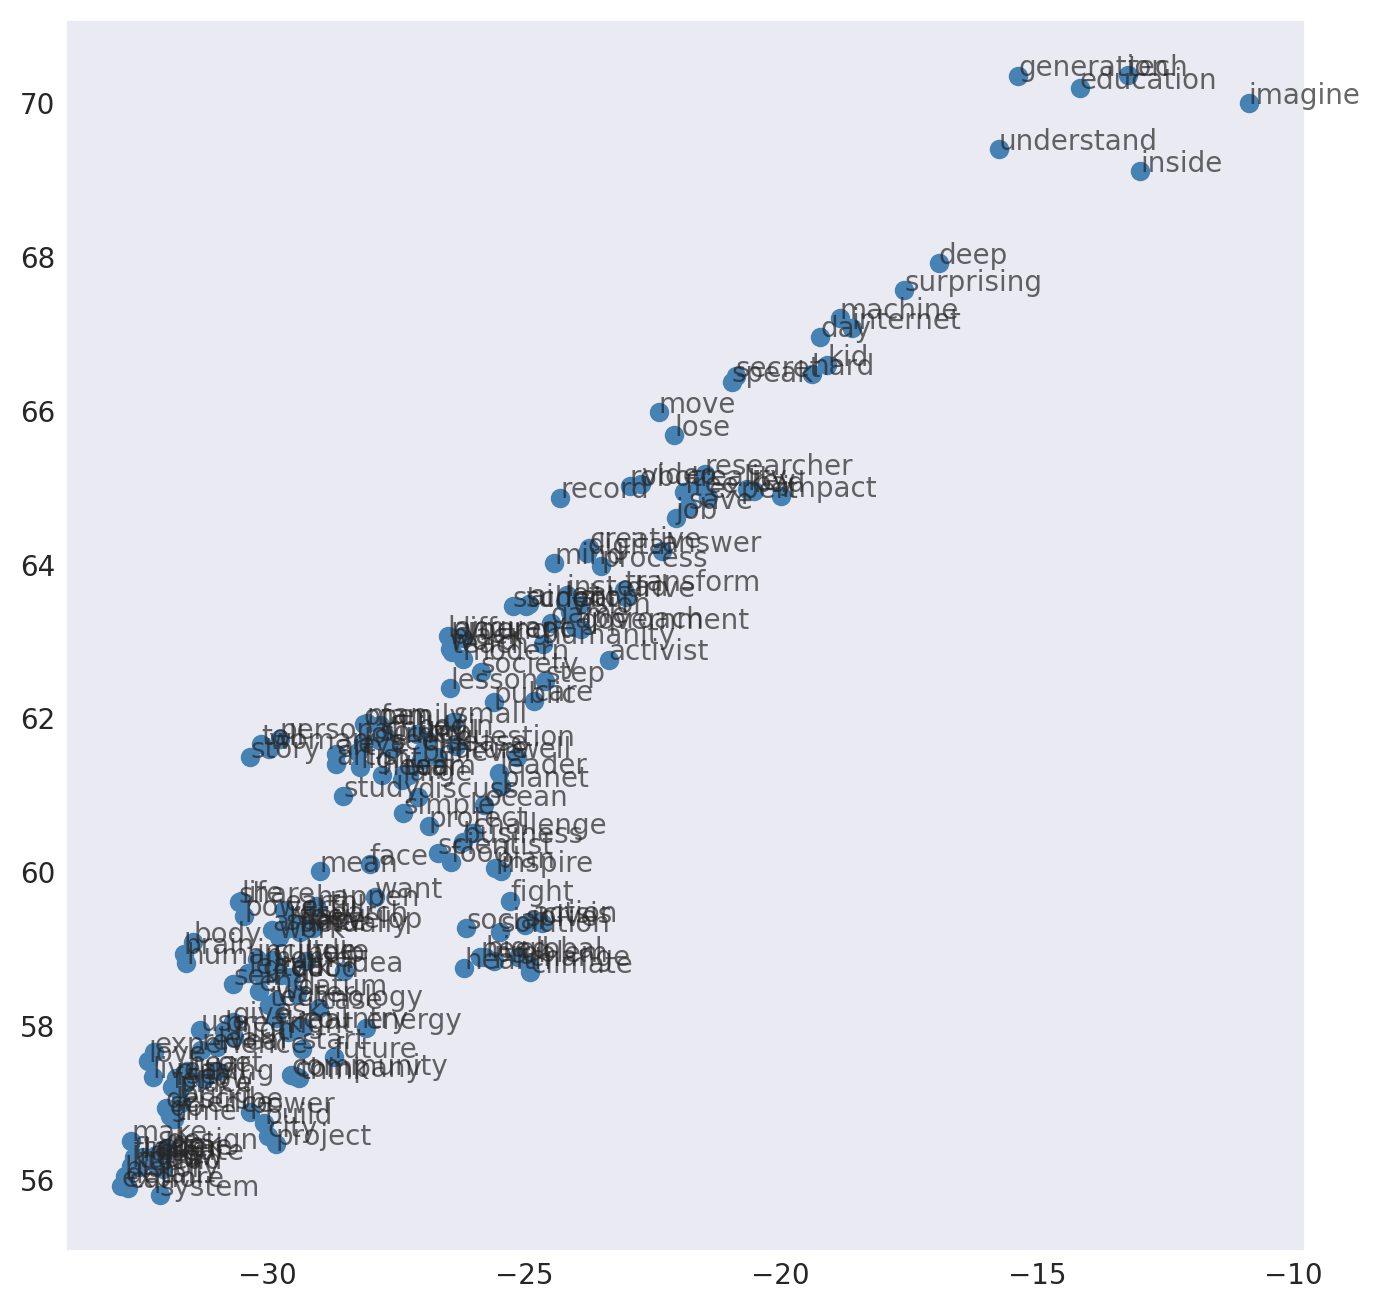

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(wv.vectors)

fig, ax = plt.subplots(figsize=(8, 8))
for idx, word in enumerate((list(wv.key_to_index.keys())[:200])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

## 4.3. Latent Diritchlet allocation

In [ ]:
from gensim.models.ldamodel import LdaModel
num_topics = 10
ldag = LdaModel(corpus=bow, id2word=D, num_topics=num_topics)

In [ ]:
ldag.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  '0.013*"climate" + 0.012*"change" + 0.010*"work" + 0.009*"ai" + 0.007*"global" + 0.006*"need" + 0.006*"power" + 0.005*"solution" + 0.005*"time" + 0.005*"design"'),
 (1,
  '0.008*"work" + 0.008*"disease" + 0.007*"body" + 0.007*"life" + 0.007*"human" + 0.006*"brain" + 0.006*"cell" + 0.005*"mental" + 0.005*"child" + 0.005*"research"'),
 (2,
  '0.014*"life" + 0.010*"work" + 0.008*"art" + 0.008*"history" + 0.006*"human" + 0.006*"change" + 0.006*"ai" + 0.005*"future" + 0.005*"explore" + 0.005*"make"'),
 (3,
  '0.010*"life" + 0.009*"story" + 0.006*"fuel" + 0.006*"energy" + 0.006*"work" + 0.005*"live" + 0.005*"self" + 0.005*"fire" + 0.004*"need" + 0.004*"ancient"'),
 (4,
  '0.017*"ai" + 0.008*"change" + 0.007*"human" + 0.007*"ocean" + 0.006*"climate" + 0.006*"future" + 0.005*"life" + 0.005*"happen" + 0.005*"time" + 0.004*"technology"'),
 (5,
  '0.013*"climate" + 0.010*"change" + 0.009*"democracy" + 0.008*"business" + 0.008*"leader" + 0.007*"community" + 0.006*"action" + 0.006*"life" + 0

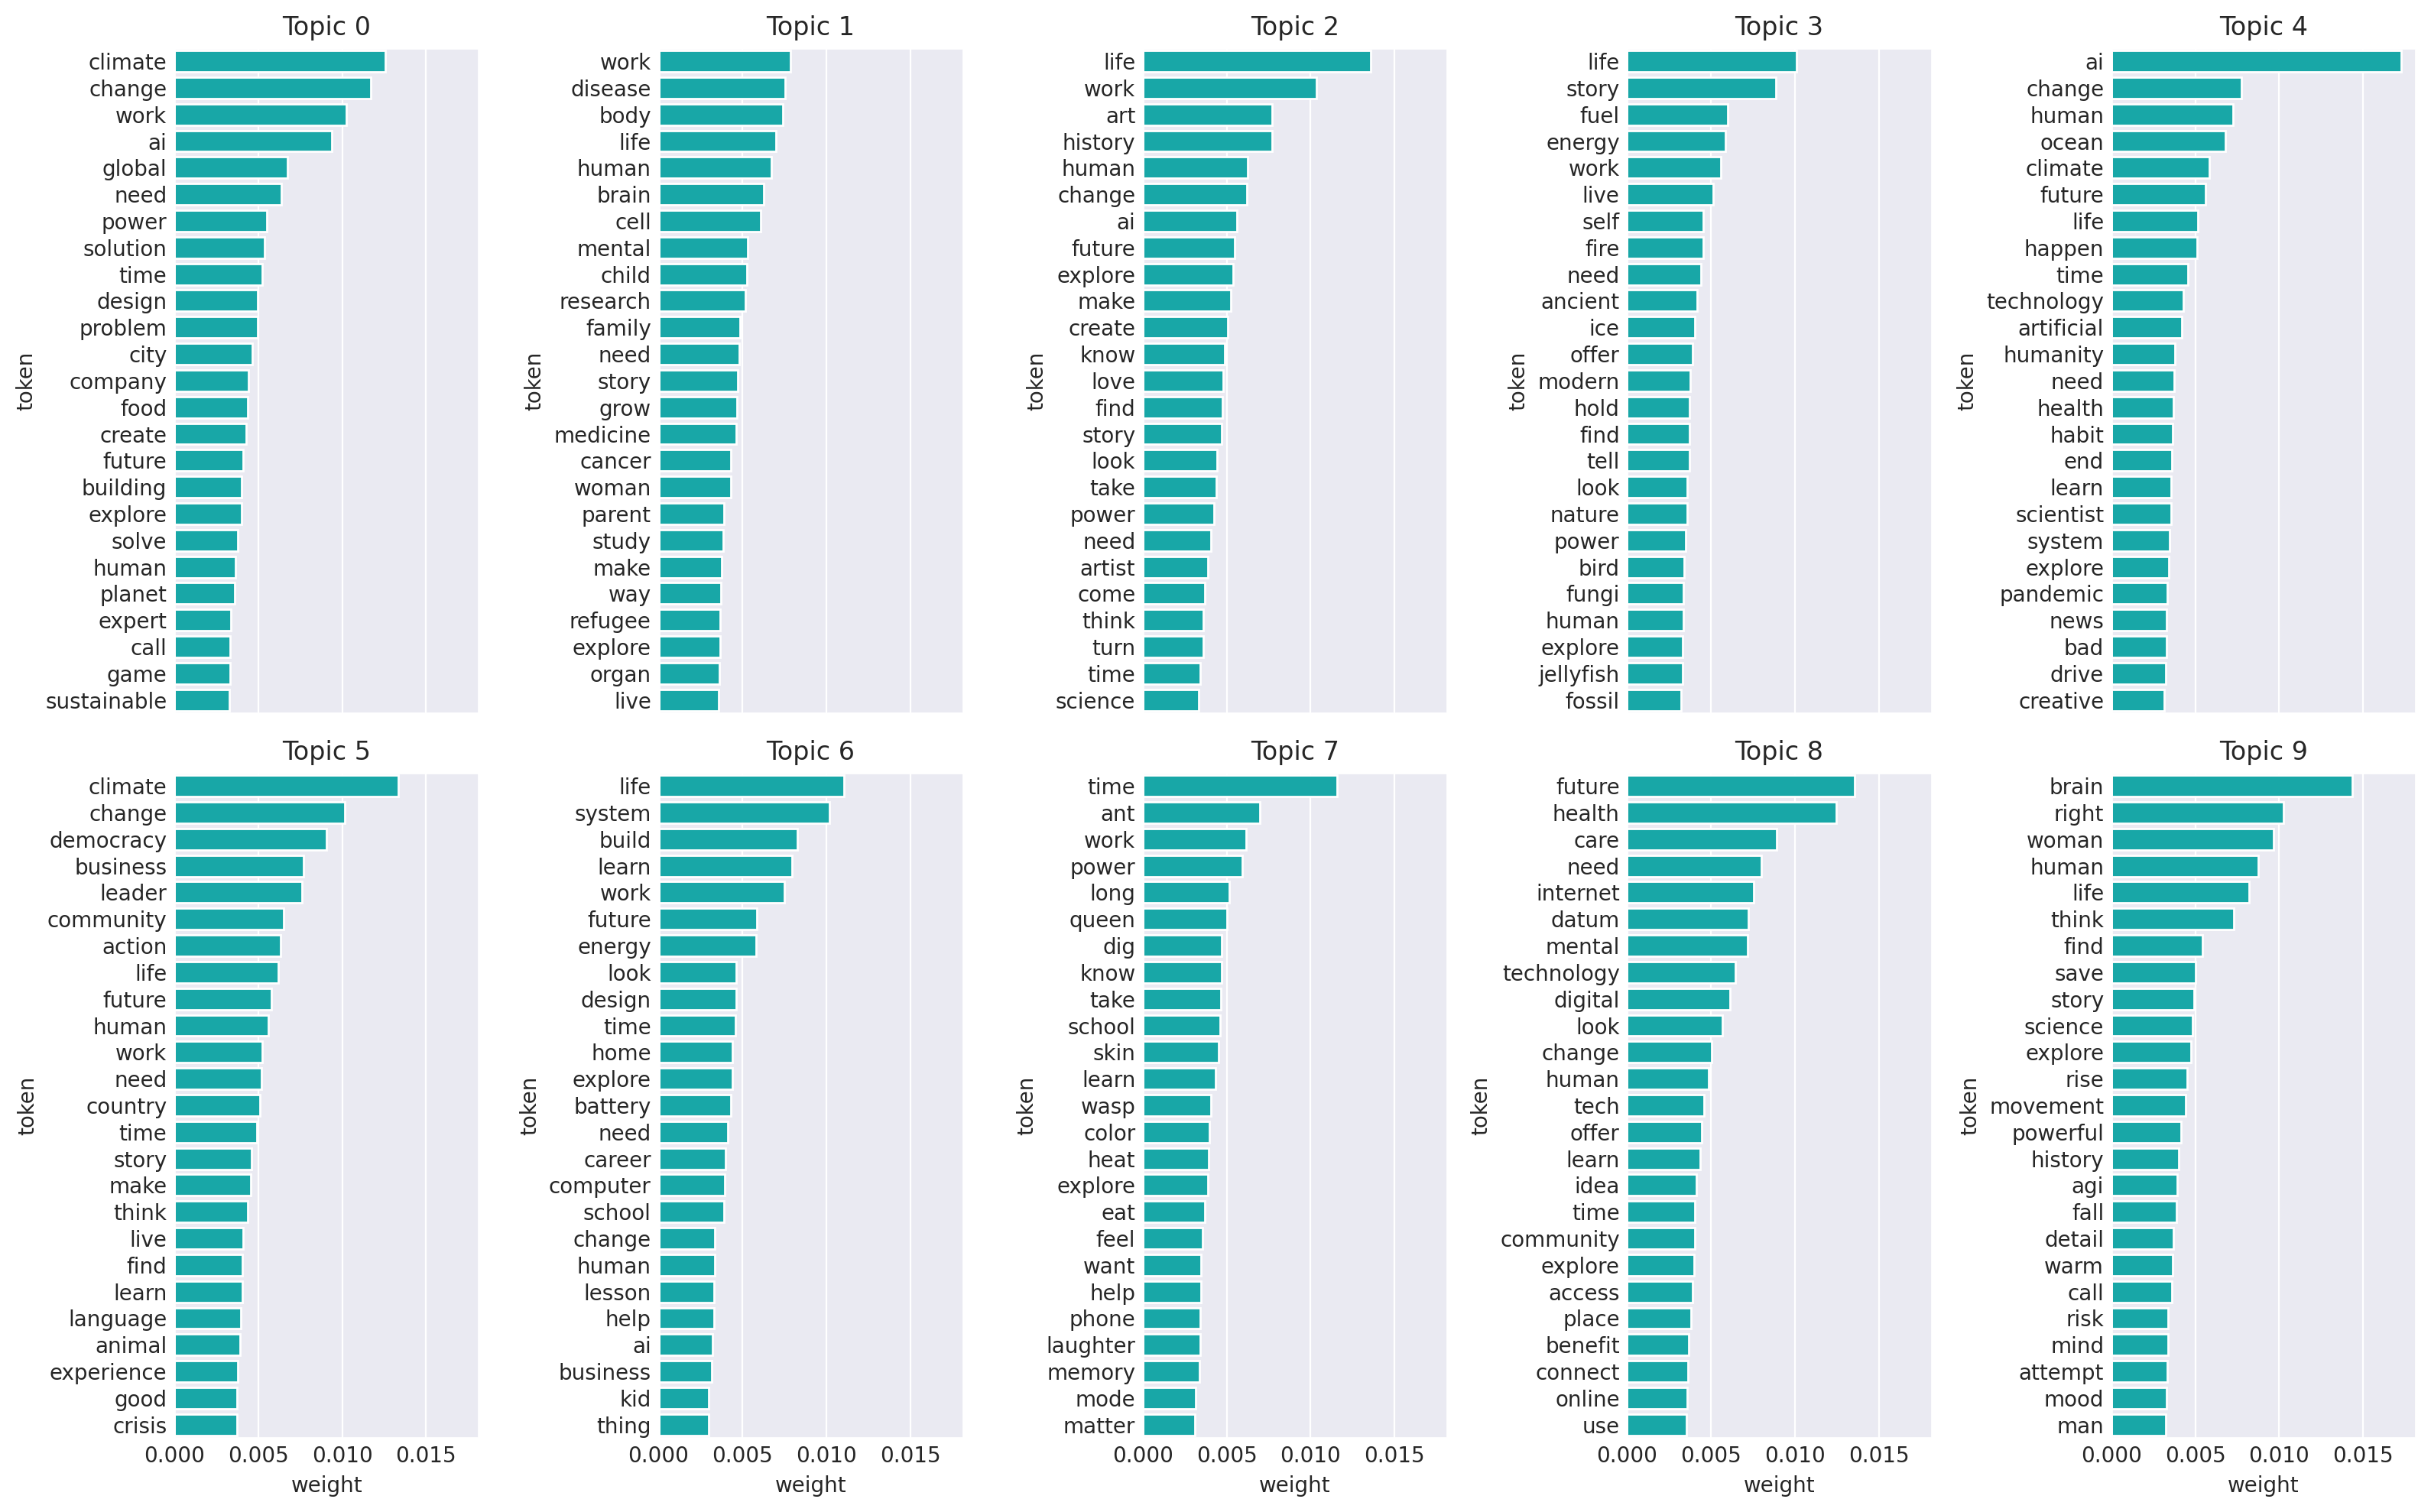

In [ ]:
topn = 25
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10), sharex=True)

for i in range(num_rows * num_cols):
    data = ldag.show_topic(i, topn=topn)
    df = pd.DataFrame(data, columns=['token', 'weight'])
    row_index = i // num_cols
    col_index = i % num_cols
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title('Topic ' + str(i))

plt.tight_layout()
plt.show()

In [ ]:
n_topics_range = list(range(1, 10, 1))
coherence_scores = []
for n_topics in n_topics_range:
    ldag = LdaModel(corpus=bow, id2word=D, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=ldag, texts=docs, dictionary=D, coherence='c_v')
    coherence_score = coherencemodel.get_coherence()
    coherence_scores.append(coherence_score)

plt.plot(n_topics_range, coherence_scores, marker='o')
plt.title('Topic Coherence vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(n_topics_range)
plt.grid(True)
plt.show()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherencemodel = CoherenceModel(ldag, texts=docs, dictionary=D, coherence='c_v')
print('The coherence of the trained model is', coherencemodel.get_coherence())

The coherence of the trained model is 0.33101140374985827


# 5. Classification

## 5.1. Encode categories

We need to binarize the labels

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_categories = mlb.fit_transform(full_df['topic_split'])
mlb.classes_

array(['art', 'business', 'climate change', 'communication', 'education',
       'entertainment', 'fitness', 'global issues', 'health',
       'leadership', 'nature', 'personal growth', 'politics',
       'psychology', 'science', 'social change', 'technology'],
      dtype=object)

In [ ]:
def warn(*args, **kwargs): # Omit warnings
    pass
import warnings
warnings.warn = warn

## 5.2. BoW model

### 5.2.1. Multilabel classification

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, encoded_categories, test_size=0.2, random_state=42)
# Declare the oversampler we will use
oversampler = SMOTE(sampling_strategy='auto', random_state=42)

Let's try to do multilabel classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Random Forest without parameter tuning
classifier1 = RandomForestClassifier()
classifier1.fit(X_train,y_train)

# Classifying all classes at once
y_pred1 = classifier1.predict(X_test)

print(classification_report(y_test,y_pred1))
print("Accuracy score:", accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       697
           1       0.88      0.15      0.25       236
           2       0.92      0.32      0.47       148
           3       0.00      0.00      0.00       137
           4       0.95      0.27      0.42       335
           5       0.00      0.00      0.00       114
           6       0.00      0.00      0.00        54
           7       0.78      0.50      0.61       554
           8       0.85      0.22      0.35       230
           9       1.00      0.11      0.20       125
          10       0.93      0.17      0.28       150
          11       0.82      0.04      0.08       204
          12       0.90      0.04      0.08       208
          13       0.71      0.04      0.08       121
          14       0.91      0.10      0.19       191
          15       1.00      0.02      0.04       220
          16       0.86      0.36      0.51       369

   micro avg       0.78   

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# SVC without parameter tuning
svc = svm.SVC(C=1.0, kernel='linear')
clf = OneVsRestClassifier(svc)

# Classifying all classes at once
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
accuracy = clf.score(X_test, y_test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       697
           1       0.50      0.44      0.47       236
           2       0.77      0.70      0.73       148
           3       0.29      0.26      0.28       137
           4       0.67      0.65      0.66       335
           5       0.45      0.32      0.38       114
           6       0.69      0.54      0.60        54
           7       0.63      0.62      0.62       554
           8       0.62      0.62      0.62       230
           9       0.55      0.42      0.47       125
          10       0.66      0.55      0.60       150
          11       0.49      0.46      0.47       204
          12       0.49      0.49      0.49       208
          13       0.34      0.27      0.30       121
          14       0.60      0.45      0.51       191
          15       0.53      0.51      0.52       220
          16       0.60      0.64      0.62       369

   micro avg       0.60   

Not really good results

## 5.2.2. Binarized Multi-Label Classification

Now let's binarize the labels

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2'], 'C': [0.4]}

scores1 = []
for i in range(y_train.shape[1]):
    # Resample to fix imbalances in classes
    X_resampled, y_resampler = oversampler.fit_resample(X_train, y_train[:, i])
    # Cross-validation
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_resampled, y_resampler)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores1.append(grid_clf.score(X_test, y_test[:,i]))

print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores1)/len(scores1)}')

Accuracy for art: 0.7227488151658767
Accuracy for business: 0.8451816745655608
Accuracy for climate change: 0.9486571879936809
Accuracy for communication: 0.8309636650868878
Accuracy for education: 0.8515007898894155
Accuracy for entertainment: 0.9139020537124802
Accuracy for fitness: 0.9699842022116903
Accuracy for global issues: 0.7464454976303317
Accuracy for health: 0.8783570300157978
Accuracy for leadership: 0.9107424960505529
Accuracy for nature: 0.9233807266982622
Accuracy for personal growth: 0.8278041074249605
Accuracy for politics: 0.8578199052132701
Accuracy for psychology: 0.8886255924170616
Accuracy for science: 0.8902053712480252
Accuracy for social change: 0.8530805687203792
Accuracy for technology: 0.8033175355450237
------------------------------------------------------------------
Mean accuracy for Logistic Regression: 0.8625127776228976


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

scores2 = []

for i in range(y_train.shape[1]):
    # Resampling
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:, i])
    grid_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores2.append(grid_clf.score(X_test, y_test[:,i]))

print('------------------------------------------------------------------')
print(f'Mean accuracy for RandomForest: {sum(scores2)/len(scores2)}')

Accuracy for art: 0.7480252764612955
Accuracy for business: 0.8562401263823065
Accuracy for climate change: 0.9399684044233807
Accuracy for communication: 0.8902053712480252
Accuracy for education: 0.844391785150079
Accuracy for entertainment: 0.9146919431279621
Accuracy for fitness: 0.9628751974723538
Accuracy for global issues: 0.7432859399684044
Accuracy for health: 0.8688783570300158
Accuracy for leadership: 0.9115323854660348
Accuracy for nature: 0.9170616113744076
Accuracy for personal growth: 0.8499210110584519
Accuracy for politics: 0.8554502369668247
Accuracy for psychology: 0.9091627172195893
Accuracy for science: 0.8736176935229067
Accuracy for social change: 0.8475513428120063
Accuracy for technology: 0.8372827804107424
------------------------------------------------------------------
Mean accuracy for RandomForest: 0.868831892946752


## 5.3. TF-IDF Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf_sparse, encoded_categories, test_size=0.2, random_state=42)

In [ ]:
# We repeat the same processes as before, using a different vectorization
# No differences in code
# Still using binarized labels
param_grid = {'penalty': ['l2'], 'C': [0.4]}
scores3 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:,i])
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores3.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores3)/len(scores3)}')

Accuracy for art: 0.7598736176935229
Accuracy for business: 0.8593996840442338
Accuracy for climate change: 0.9447077409162717
Accuracy for communication: 0.8325434439178515
Accuracy for education: 0.8593996840442338
Accuracy for entertainment: 0.9139020537124802
Accuracy for fitness: 0.9755134281200631
Accuracy for global issues: 0.7819905213270142
Accuracy for health: 0.8965244865718799
Accuracy for leadership: 0.9186413902053713
Accuracy for nature: 0.9249605055292259
Accuracy for personal growth: 0.839652448657188
Accuracy for politics: 0.8775671406003159
Accuracy for psychology: 0.8902053712480252
Accuracy for science: 0.8894154818325435
Accuracy for social change: 0.8507109004739336
Accuracy for technology: 0.8388625592417062
------------------------------------------------------------------
Mean accuracy for Logistic Regression: 0.8737570857726977


In [ ]:
scores4 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:, i])
    grid_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores4.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for RandomForest: {sum(scores4)/len(scores4)}')

Accuracy for art: 0.7456556082148499
Accuracy for business: 0.8665086887835703
Accuracy for climate change: 0.9439178515007899
Accuracy for communication: 0.891785150078989
Accuracy for education: 0.8704581358609794
Accuracy for entertainment: 0.9241706161137441
Accuracy for fitness: 0.9684044233807267
Accuracy for global issues: 0.7582938388625592
Accuracy for health: 0.8862559241706162
Accuracy for leadership: 0.915481832543444
Accuracy for nature: 0.9233807266982622
Accuracy for personal growth: 0.8625592417061612
Accuracy for politics: 0.8641390205371248
Accuracy for psychology: 0.9107424960505529
Accuracy for science: 0.8854660347551343
Accuracy for social change: 0.8483412322274881
Accuracy for technology: 0.839652448657188
------------------------------------------------------------------
Mean accuracy for RandomForest: 0.8767772511848343


## 5.4. Word2Vec Classification

### 5.4.1. Mean Vector

In [ ]:
def get_mean_vector(model, sentence):
  """
  The representative of each document will be the mean of its sentences'
  vectors
  """
  vector = [model[str(token)] for token in sentence if str(token) in wv]
  if vector:
    return np.mean(vector, axis=0)
  else:
    return np.zeros(wv.vector_size)

In [ ]:
# Obtain mean vectors
vectors = []
for sentence in docs:
  vectors.append(get_mean_vector(wv, sentence))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors, encoded_categories, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'penalty': ['l2'], 'C': [0.4]}

scores5 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:,i])
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores5.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores5)/len(scores5)}')

Accuracy for art: 0.6018957345971564
Accuracy for business: 0.6263823064770933
Accuracy for climate change: 0.8420221169036335
Accuracy for communication: 0.5387045813586098
Accuracy for education: 0.6042654028436019
Accuracy for entertainment: 0.6011058451816745
Accuracy for fitness: 0.584518167456556
Accuracy for global issues: 0.6050552922590837
Accuracy for health: 0.5829383886255924
Accuracy for leadership: 0.6153238546603476
Accuracy for nature: 0.5552922590837283
Accuracy for personal growth: 0.590047393364929
Accuracy for politics: 0.6208530805687204
Accuracy for psychology: 0.5537124802527646
Accuracy for science: 0.5552922590837283
Accuracy for social change: 0.6524486571879937
Accuracy for technology: 0.6303317535545023
------------------------------------------------------------------
Mean accuracy for Logistic Regression: 0.6094229160858657


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

scores6 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:, i])
    grid_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores6.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for RandomForest: {sum(scores6)/len(scores6)}')

Accuracy for art: 0.6611374407582938
Accuracy for business: 0.782780410742496
Accuracy for climate change: 0.9067930489731437
Accuracy for communication: 0.8609794628751974
Accuracy for education: 0.7211690363349131
Accuracy for entertainment: 0.8696682464454977
Accuracy for fitness: 0.9375987361769352
Accuracy for global issues: 0.6563981042654028
Accuracy for health: 0.8080568720379147
Accuracy for leadership: 0.8712480252764613
Accuracy for nature: 0.8380726698262243
Accuracy for personal growth: 0.8041074249605056
Accuracy for politics: 0.8048973143759873
Accuracy for psychology: 0.863349131121643
Accuracy for science: 0.8278041074249605
Accuracy for social change: 0.7914691943127962
Accuracy for technology: 0.7567140600315956
------------------------------------------------------------------
Mean accuracy for RandomForest: 0.8095437227023511


### 5.4.2. PCA Vector

In [ ]:
lengths = []
for sent in docs:
    lengths.append(len(sent))
max_len = max(lengths)

In [ ]:
def get_embedding_matrix(model, sentence):
    """
    Generate an embedding matrix for the given sentence using
    the provided model.
    """
    vector = []
    padded_sentence = np.concatenate((sentence, np.zeros(max_len - len(sentence))))
    for token in padded_sentence:
        if str(token) in wv:
            vector.append(model[str(token)])
        else:
            vector.append(np.zeros(wv.vector_size))

    vector = np.array(vector).reshape(-1, wv.vector_size)

    return vector

In [ ]:
from sklearn.decomposition import PCA

embedding_matrix = []
for sent in docs:
    embedding_matrix.append(get_embedding_matrix(wv, sent))

embedding_matrix = np.array(embedding_matrix)
embedding_matrix = embedding_matrix.reshape(embedding_matrix.shape[0] * embedding_matrix.shape[1], embedding_matrix.shape[2])

pca = PCA(n_components=1)
reduced_embeddings = pca.fit_transform(embedding_matrix)

reduced_embedding_matrix = np.array(reduced_embeddings).reshape(-1, max_len)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reduced_embedding_matrix_scaled = scaler.fit_transform(reduced_embedding_matrix)

X_train, X_test, y_train, y_test = train_test_split(reduced_embedding_matrix_scaled, encoded_categories, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'penalty': ['l2'], 'C': [0.4]}

scores7 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:,i])
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores7.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores7)/len(scores7)}')

Accuracy for art: 0.5505529225908373
Accuracy for business: 0.5647709320695102
Accuracy for climate change: 0.6516587677725119
Accuracy for communication: 0.6184834123222749
Accuracy for education: 0.5837282780410743
Accuracy for entertainment: 0.6753554502369669
Accuracy for fitness: 0.5718799368088467
Accuracy for global issues: 0.5600315955766193
Accuracy for health: 0.5323854660347551
Accuracy for leadership: 0.6248025276461295
Accuracy for nature: 0.5789889415481833
Accuracy for personal growth: 0.5481832543443917
Accuracy for politics: 0.6034755134281201
Accuracy for psychology: 0.5347551342812006
Accuracy for science: 0.504739336492891
Accuracy for social change: 0.6232227488151659
Accuracy for technology: 0.5671406003159558
------------------------------------------------------------------
Mean accuracy for Logistic Regression: 0.5820091069603197


In [ ]:
param_grid = {'n_estimators': [200], 'min_samples_split': [2] }
scores8 = []
for i in range(y_train.shape[1]):
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train[:, i])
    grid_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2)
    grid_clf.fit(X_resampled, y_resampled)
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores8.append(grid_clf.score(X_test, y_test[:,i]))
print('------------------------------------------------------------------')
print(f'Mean accuracy for RandomForest: {sum(scores8)/len(scores8)}')

Accuracy for art: 0.5726698262243286
Accuracy for business: 0.7701421800947867
Accuracy for climate change: 0.8665086887835703
Accuracy for communication: 0.8696682464454977
Accuracy for education: 0.7266982622432859
Accuracy for entertainment: 0.8775671406003159
Accuracy for fitness: 0.9407582938388626
Accuracy for global issues: 0.5339652448657188
Accuracy for health: 0.7701421800947867
Accuracy for leadership: 0.8736176935229067
Accuracy for nature: 0.8554502369668247
Accuracy for personal growth: 0.8096366508688784
Accuracy for politics: 0.8041074249605056
Accuracy for psychology: 0.8830963665086888
Accuracy for science: 0.8206951026856241
Accuracy for social change: 0.7677725118483413
Accuracy for technology: 0.660347551342812
------------------------------------------------------------------
Mean accuracy for RandomForest: 0.7884025648173961


In [ ]:
plt.figure(figsize=(16,6))
df_plot = pd.DataFrame({
    'score1': scores1,
    'score2': scores2,
    'score3': scores3,
    'score4': scores4,
    'score5': scores5,
    'score6': scores6,
    'score7': scores7,
    'score8': scores8,
    'category': mlb.classes_
})
sns.lineplot(data=df_plot, x='category', y='score1', linestyle='-', color='red', label='BoW Logistic Regression')
sns.lineplot(data=df_plot, x='category', y='score2', linestyle='--', color='red', label='BoW Random Forest')
sns.lineplot(data=df_plot, x='category', y='score3', linestyle='-', color='blue', label='TF-IDF Logistic Regression')
sns.lineplot(data=df_plot, x='category', y='score4', linestyle='--', color='blue', label='TF-IDF Random Forest')
sns.lineplot(data=df_plot, x='category', y='score5', linestyle='-', color='green', label='Word2Vec Mean Logistic Regression')
sns.lineplot(data=df_plot, x='category', y='score6', linestyle='--', color='green', label='Word2Vec Mean Random Forest')
sns.lineplot(data=df_plot, x='category', y='score7', linestyle='-', color='purple', label='Word2Vec PCA Logistic Regression')
sns.lineplot(data=df_plot, x='category', y='score8', linestyle='--', color='purple', label='Word2Vec PCA Random Forest')

plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Scores by Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# 6. Clustering

Some standard clustering

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors, encoded_categories, test_size=0.2)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Obtain simple clustering, with k as the number of categories in the dataset
kmeans = KMeans(n_clusters=17, random_state=42, n_init = 10)
cluster_labels = kmeans.fit_predict(X_train)
silhouette_avg = silhouette_score(X_train, kmeans.labels_)

# Evaluate clustering performance
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3416349


In [ ]:
silhouette_scores = []
optimal_num_clusters = -1

for n_clusters in range(2, 18):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)

    # Append silhouette score and corresponding number of clusters to the lists
    silhouette_scores.append(silhouette_avg)

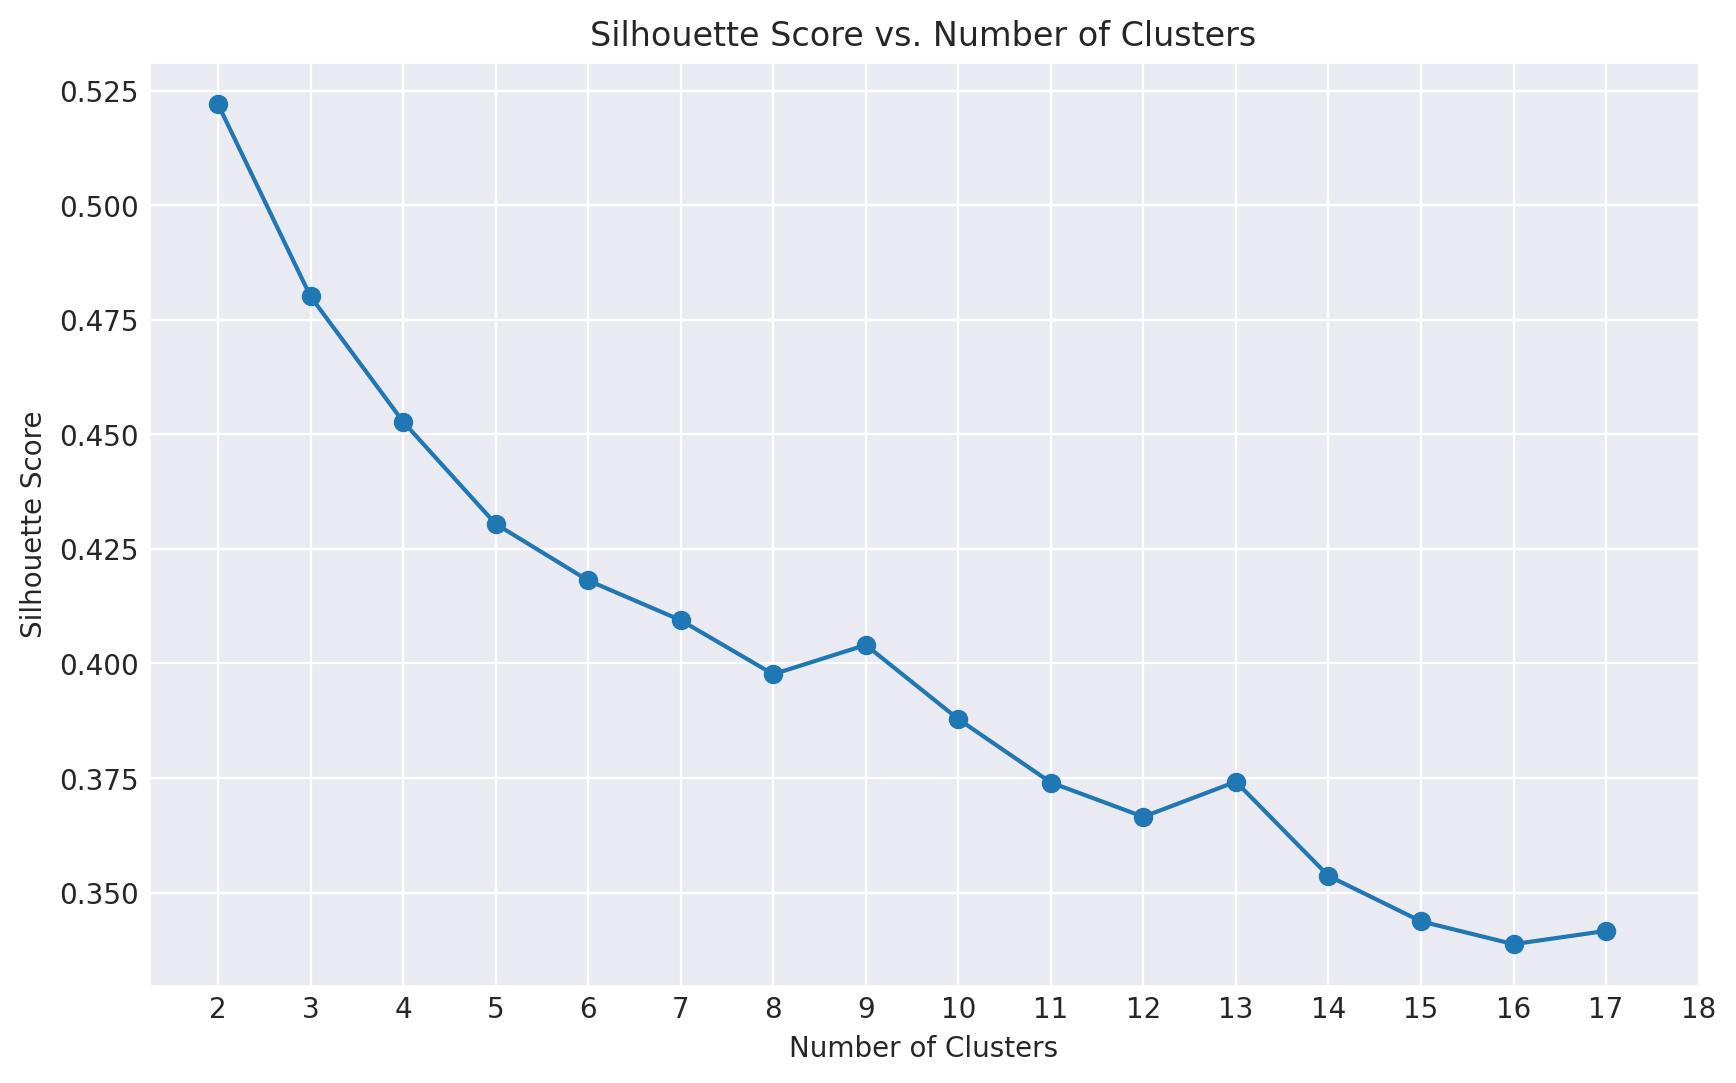

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2,18), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 19, 1.0))
plt.grid(True)
plt.show()

This is frankly disconcerting. Let us see if we can do something with this.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 10)
cluster_labels = kmeans.fit_predict(X_train)
silhouette_avg = silhouette_score(X_train, cluster_labels)

In [ ]:
print(full_df['topic_split'], cluster_labels)
sum(cluster_labels)/len(cluster_labels)

0                                       [art, technology]
1                  [personal growth, fitness, leadership]
2                   [education, technology, art, science]
3       [global issues, communication, social change, ...
4                             [global issues, technology]
                              ...                        
6363               [technology, education, social change]
6364                           [business, climate change]
6365                                        [art, health]
6366    [global issues, nature, technology, social cha...
6367             [education, nature, art, climate change]
Name: topic_split, Length: 6327, dtype: object [0 1 0 ... 0 1 1]


0.5540407034182968

In [ ]:
names = full_df['topic_split'].copy()

In [ ]:
names.reset_index(drop=True, inplace=True)

In [ ]:
topics_clusters = []
for lab in [0,1]:
  indices = np.where(cluster_labels == lab)[0]
  topics = [names[index] for index in indices]
  all_topics_in_cluster = [name for sublist in topics for name in sublist]
  topics_clusters.append(all_topics_in_cluster)

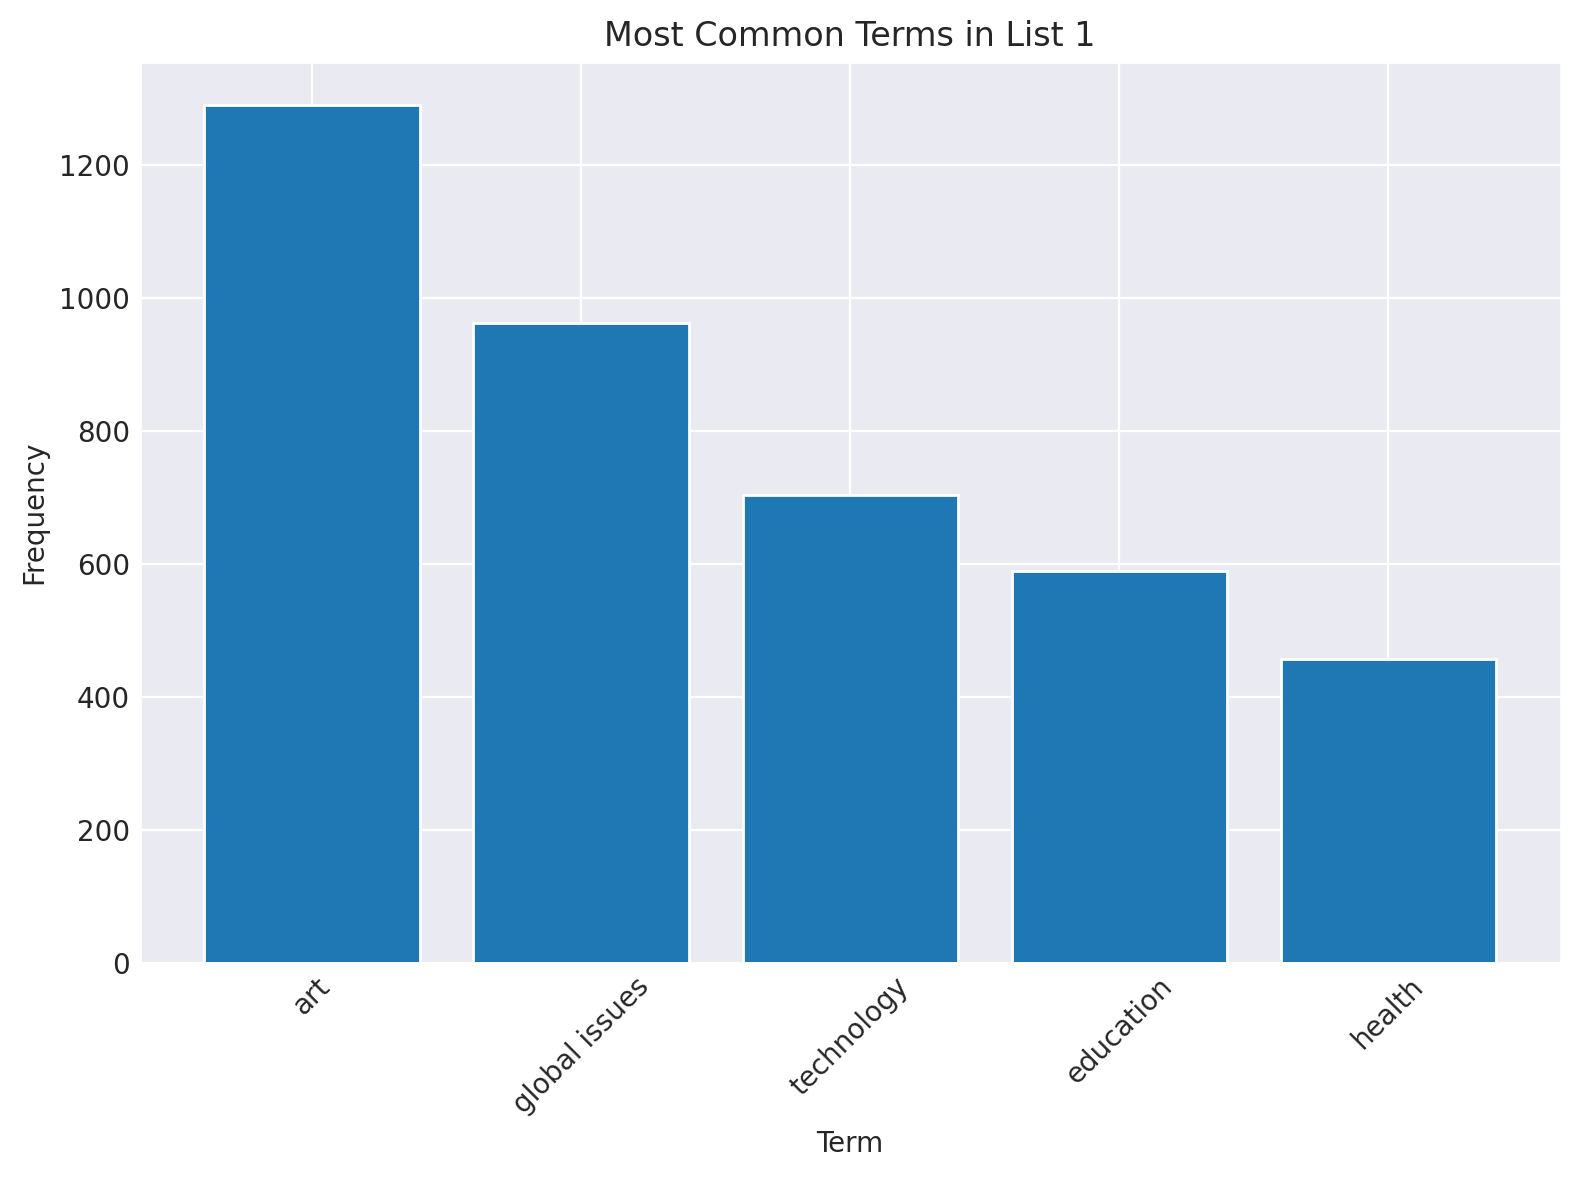

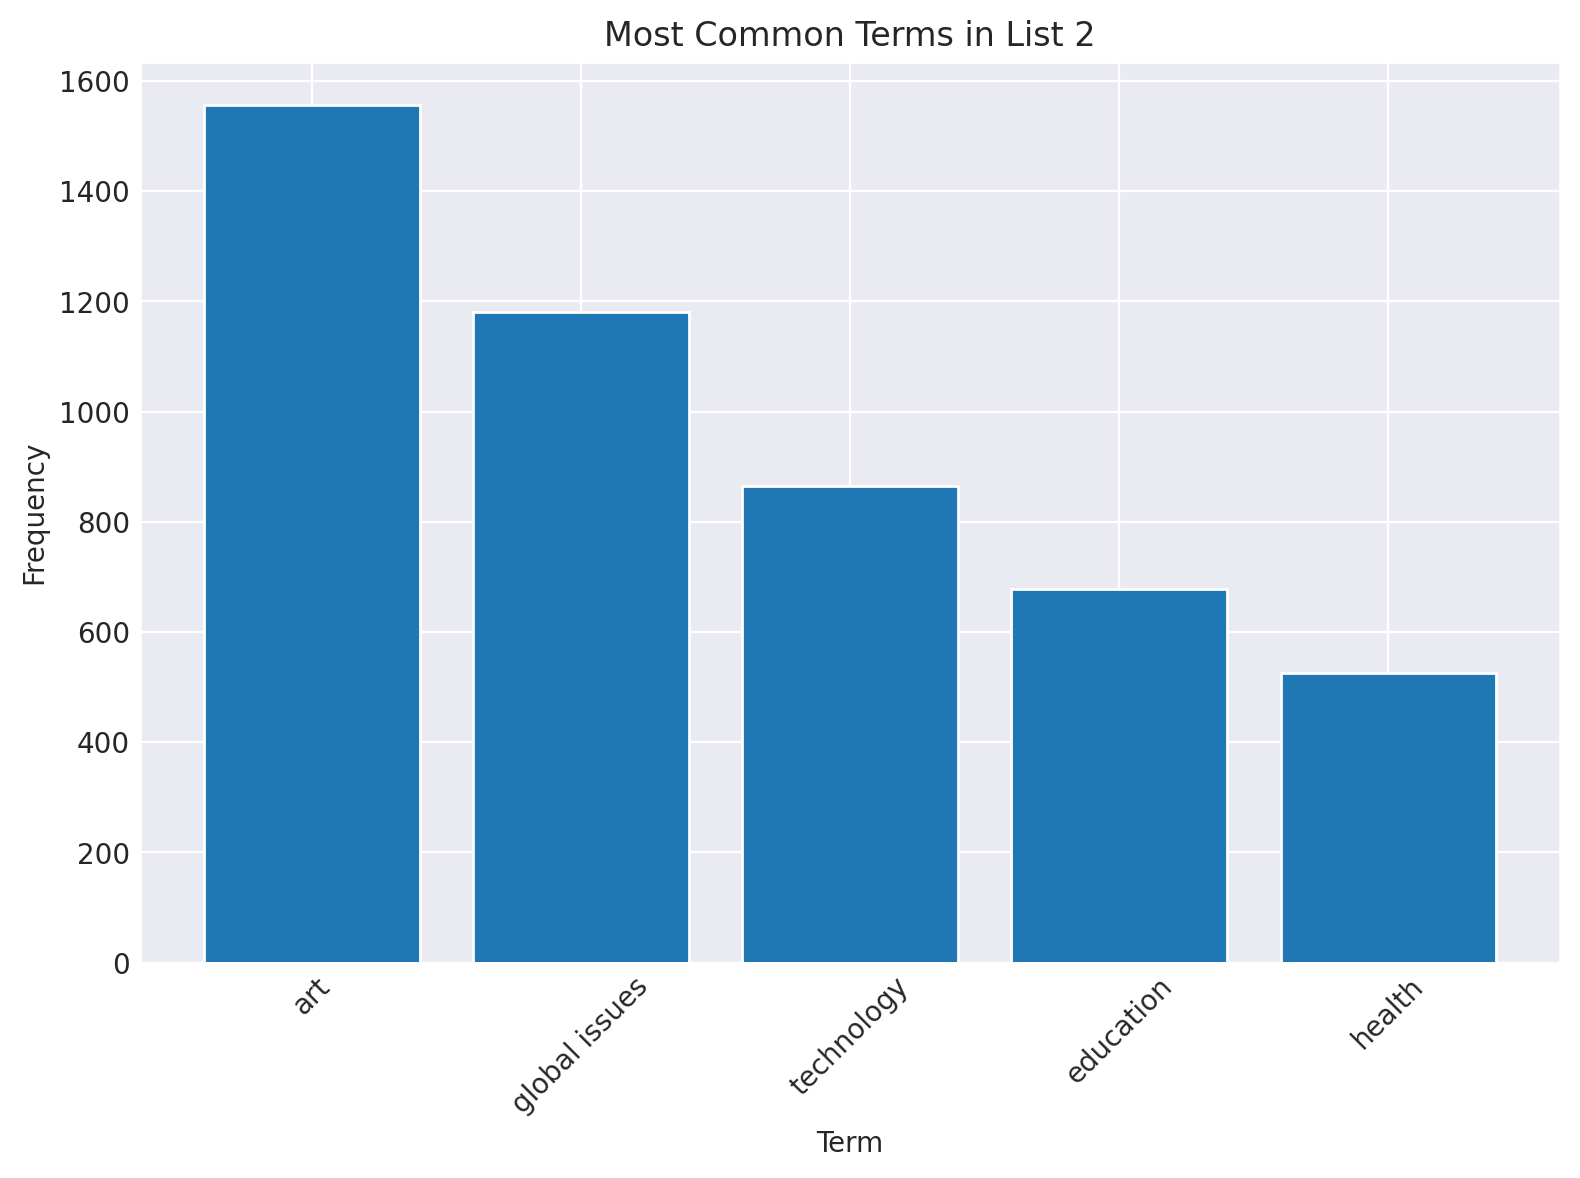

In [ ]:
from collections import Counter
for i, inner_list in enumerate(topics_clusters):
    term_counts = Counter(inner_list)

    # Get the most common terms and their counts
    most_common_terms = term_counts.most_common(5)  # Change 5 to the number of terms you want to plot

    # Extract terms and their counts
    terms, counts = zip(*most_common_terms)

    # Plot the most common terms
    plt.figure(figsize=(8, 6))
    plt.bar(terms, counts)
    plt.title(f"Most Common Terms in List {i+1}")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

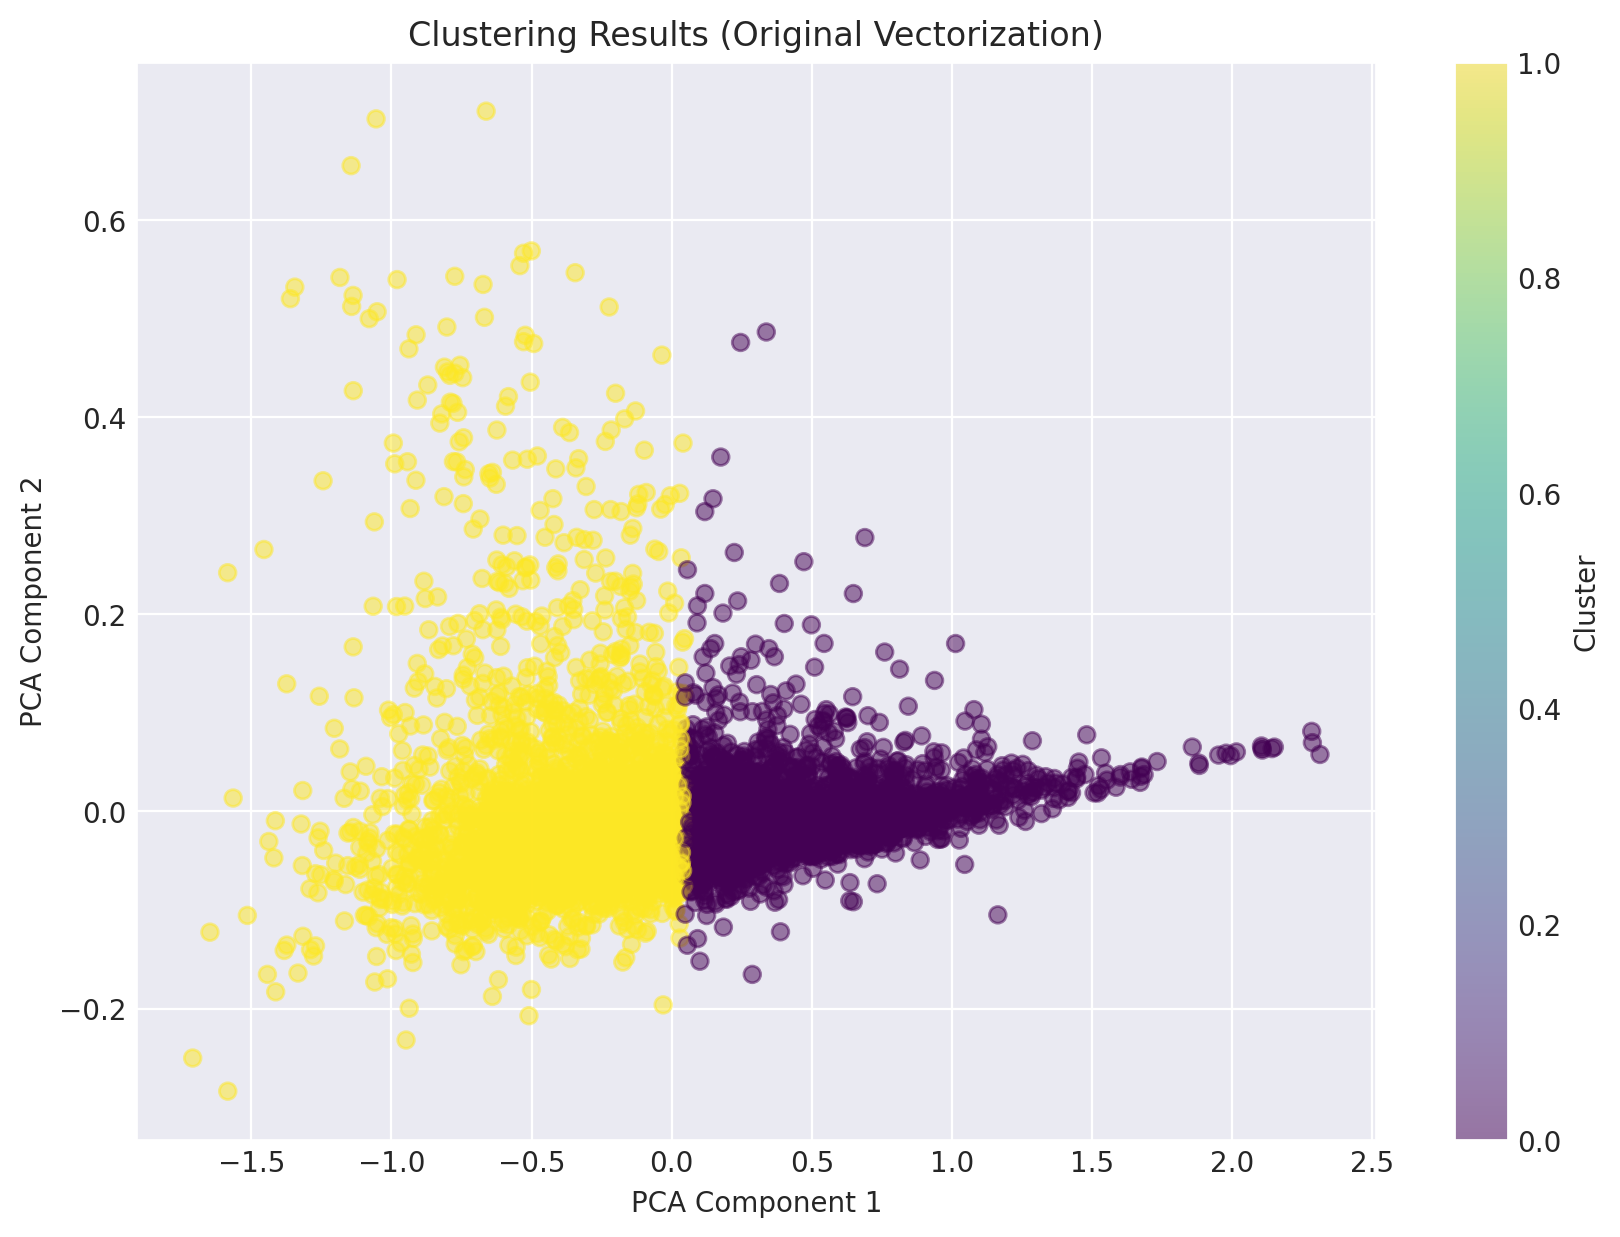

In [ ]:
pca = PCA(n_components=2)  # You can adjust the number of components
X_pca = pca.fit_transform(X_train)

# Visualize clustering results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Results (Original Vectorization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()